<a href="https://colab.research.google.com/github/worldofaryavart/colab_notebooks/blob/colabnotebook/stackoverflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stack_overflow_16k.tar.gz to stack_overflow_16k.tar.gz


In [ ]:
import tarfile
import os

tar = tarfile.open("stack_overflow_16k.tar.gz", "r:gz")
tar.extractall()
tar.close()

In [ ]:
print(os.listdir(os.getcwd()))

['.config', 'README.md', 'train', 'test', 'stack_overflow_16k.tar.gz', 'sample_data']


In [ ]:
train_dir = os.path.join(os.getcwd(), os.path.splitext(os.path.basename("train"))[0])

In [ ]:
test_dir = os.path.join(os.getcwd(), os.path.splitext(os.path.basename("test"))[0])

In [ ]:
os.listdir(train_dir)

['csharp', 'javascript', 'java', 'python']

In [ ]:
os.listdir(test_dir)

['csharp', 'javascript', 'java', 'python']

In [ ]:
sample_file = os.path.join(train_dir, 'python/0.txt')
with open(sample_file) as f:
  print(f.read())

"is it legal to define two methods with the same name but different returning types? i've written a piece of code to determine a typical palindrome string. i did this by the definition of a reverse() method returning a string. i also eager to have the same method, but in the void form, because of some future needs..as i add the latter to the code, the valid output will become invalid..so, the question is that is it legal to define two methods with the same name but different returning types?.if not, please let me know how to write this code with the void-type method...class detector(object):.    def __init__(self,string):.        self.string = string..    forbidden = (' ','!','?','.','-','_','&amp;','%',""#"","","")..    def eliminator(self):.        for item in self.forbidden:.            if item in self.string:.                self.string = self.string.replace(item,"""")..    def reverse(self):.        return self.string[::-1]            ..    #def reverse(self):.    #    self.string

**Now lets load the dataset**


In [ ]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'train',
    batch_size= batch_size,
    validation_split =0.2,
    subset = 'training',
    seed = seed
)

Found 8000 files belonging to 4 classes.
Using 6400 files for training.


In [ ]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(10):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'"blank8 why is my solution faster than the neat solution? (hackerrank chocolate feast) edit: simplified my solution..edit: removed opinion based secondary question...background: atarted learning blank a week or two ago using hackerranks problems as exercises and stackoverflow search + google as my teacher, i\'ve had some limited experience learning other languages...i did the exercise my own ""noobish learner way"" which i can\'t help but feel is a ""botched job"" when i see ""neat &amp; short"" solutions...however, when submitting both solutions one after another a couple of times i found the ""neat"" solution was quite a bit slower. ..i vaguely remember something about % operations being costly, is mine faster because of no % operations or is there more to it than just that?..exercise: https://www.hackerrank.com/challenges/chocolate-feast..neat solution from discussion:..import blank.io.*;.import blank.util.*;..public class solution {.    static int cc; .    public static vo

In [ ]:
for j in range(4):
  print("label "+str(j)+" corresponds to ", raw_train_ds.class_names[j])

label 0 corresponds to  csharp
label 1 corresponds to  java
label 2 corresponds to  javascript
label 3 corresponds to  python


In [ ]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'train',
    batch_size = batch_size,
    validation_split = 0.2,
    subset = 'validation',
    seed = seed
)

Found 8000 files belonging to 4 classes.
Using 1600 files for validation.


In [ ]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'test',
    batch_size = batch_size
)

Found 8000 files belonging to 4 classes.


**Preprocessing the dataset**

In [ ]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [ ]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(
    standardize = custom_standardization,
    max_tokens = max_features,
    output_mode = 'int',
    output_sequence_length = sequence_length
)

In [ ]:
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [ ]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [ ]:
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'"function expected error in blank for dynamically created check box when it is clicked i want to grab the attribute value.it is working in ie 8,9,10 but not working in ie 11,chrome shows function expected error..&lt;input type=checkbox checked=\'checked\' id=\'symptomfailurecodeid\' tabindex=\'54\' style=\'cursor:pointer;\' onclick=chkclickevt(this);  failurecodeid=""1"" &gt;...function chkclickevt(obj) { .    alert(obj.attributes(""failurecodeid""));.}"\n', shape=(), dtype=string)
Label javascript
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  38,  450,   65,    7,   16,   12,  892,  265,  186,  451,   44,
          11,    6,  685,    3,   46,    4, 2062,    2,  485,    1,    6,
         158,    7,  479,    1,   26,   20,  158,    7,  479,    1,  502,
          38,  450,    1, 1767, 1763,    1,    1,    1,    1,    1,    1,
           1,    1,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,   

In [ ]:
print("450 ---> ", vectorize_layer.get_vocabulary()[450])
print("1 ---> ", vectorize_layer.get_vocabulary()[7])
print("Vocabulary size: {}" .format(len(vectorize_layer.get_vocabulary())))

450 --->  expected
1 --->  in
Vocabulary size: 10000


In [ ]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

**Lets create the neural network**

In [ ]:
embedding_dim = 16

In [ ]:
model = tf.keras.Sequential([
  layers.Embedding(max_features, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(4, activation='sigmoid')])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 16)          160000    
                                                                 
 dropout_7 (Dropout)         (None, None, 16)          0         
                                                                 
 global_average_pooling1d_5  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 68        
                                                                 
Total params: 160068 (625.27 KB)
Trainable params: 160068 (625.27 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [ ]:
model.compile(loss = losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
200/200 [==============================] - 15s 73ms/step - loss: 1.3773 - accuracy: 0.3372 - val_loss: 1.3678 - val_accuracy: 0.4798
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 1.3485 - accuracy: 0.4647 - val_loss: 1.3315 - val_accuracy: 0.5229
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: 1.2965 - accuracy: 0.5433 - val_loss: 1.2745 - val_accuracy: 0.5701
Epoch 4/10
200/200 [==============================] - 1s 7ms/step - loss: 1.2265 - accuracy: 0.6028 - val_loss: 1.2054 - val_accuracy: 0.6181
Epoch 5/10
200/200 [==============================] - 1s 7ms/step - loss: 1.1484 - accuracy: 0.6547 - val_loss: 1.1337 - val_accuracy: 0.6595
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 1.0699 - accuracy: 0.6953 - val_loss: 1.0653 - val_accuracy: 0.6850
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.9985 - accuracy: 0.7253 - val_loss: 1.0028 - val_accuracy: 0.7072
Epoc

In [ ]:
loss, accuracy = model.evaluate(test_ds)

print("loss: ", loss)
print("Accuracy: ", accuracy)

250/250 [==============================] - 1s 5ms/step - loss: 0.8589 - accuracy: 0.7393
loss:  0.8588516712188721
Accuracy:  0.7392500042915344


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

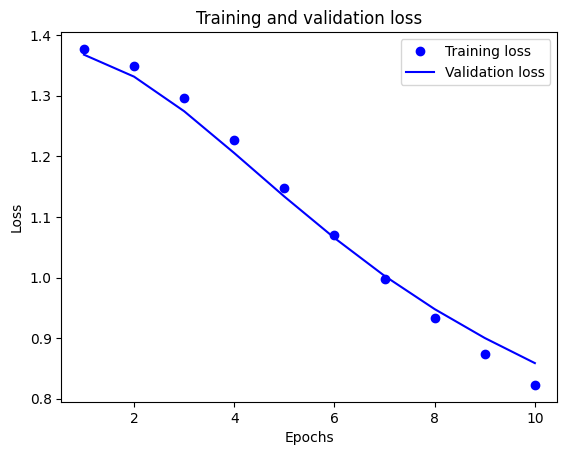

In [ ]:
import matplotlib.pyplot as plt
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

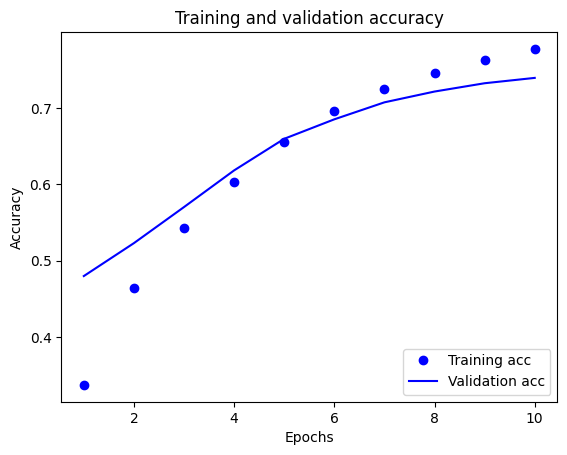

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
export_model = tf.keras.Sequential([
    vectorize_layer,
    model,
    layers.Activation('sigmoid')
])

export_model.compile(loss = losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = 'adam',
              metrics = ['accuracy'])
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


250/250 [==============================] - 2s 6ms/step - loss: 1.2203 - accuracy: 0.7393
0.7392500042915344


In [ ]:
examples = tf.constant([
    "variable = self.variable",
    "const guess = document.getelementbyid('name')",
    "String greeting = 'Hello, ' + 'World!';",
    "string value = null; string result = value ?? 'Default Value'; "
])
predictions = export_model.predict(examples)

1/1 [==============================] - 0s 135ms/step


In [ ]:
predictions


array([[0.62434417, 0.61434895, 0.6381169 , 0.61806744],
       [0.6259082 , 0.61199486, 0.64092034, 0.6169062 ],
       [0.62782544, 0.62025017, 0.6327884 , 0.61341804],
       [0.64010715, 0.62487423, 0.63323253, 0.59807295]], dtype=float32)

In [ ]:
predictions[0]

array([0.62434417, 0.61434895, 0.6381169 , 0.61806744], dtype=float32)

In [ ]:
example = tf.constant([
    "typeerror: must be str, not int -- blank error def absolutevalue(num):.        if num &gt;= 0:.            abs_num = num.        else:.            abs_num = -num.        print(""the absolute value""+ abs_num)...if i try to run the function absolutevalue(4), it throws error as follows..traceback (most recent call last):..  file ""&lt;iblank-input-16-36bd355eb83d&gt;"", line 1, in &lt;module&gt;.    absolutevalue(4)..  file ""&lt;iblank-input-15-42a3de37c325&gt;"", line 6, in absolutevalue.    print(""the absolute value""+ abs_num)..typeerror: must be str, not int",
    "why in blank range (0,x**2+1) very slow? here is my code ..def(x):.    for i in range (0,x**2+1):.        ......but i found it is very slow!!.who can tell me the reason,thanks!"

])
export_model.predict(example)

1/1 [==============================] - 0s 18ms/step


array([[0.5882126 , 0.59223264, 0.6141301 , 0.68176883],
       [0.6153586 , 0.61081713, 0.62899417, 0.6361699 ]], dtype=float32)